In [13]:
import pandas as pd
import numpy as np
from pandas import read_excel

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = 'EastWestAirlines.xlsx'   ## Ecel file loaded

all_sheets_df = pd.read_excel(file_path, sheet_name=None)

description_df = all_sheets_df['Description']
airlines = all_sheets_df['data']
airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
airlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [4]:
airlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [5]:
airlines.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airlines.duplicated().sum()

0

In [8]:
data = airlines.copy()

In [9]:
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [10]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
data.drop(['ID#'], axis=1, inplace=True)

In [12]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [14]:
norm = MinMaxScaler()
norm_df = norm.fit_transform(data)
norm_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [15]:
std = StandardScaler()
std_df = std.fit_transform(data)
std_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [16]:
data.corr()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
Days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403487     0.324935           0.217551   
Qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles            -0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313          -0.001777   
Bonus_miles           1.000000     0.603180           0.183536   
Bonus_trans           0.603180     1.000000           0.377216   
Flight_miles_12mo     0.183536     0.377216           1.000000   
Flight_trans_12       0.185261     0.432364           0.869193   
Days_since_enroll     0.210397     0.161262           0.037271   
Award?                0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

In [17]:
lines = pd.DataFrame(data)
correlation_matrix = lines.corr()
correlation_matrix

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
Days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403487     0.324935           0.217551   
Qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles            -0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313          -0.001777   
Bonus_miles           1.000000     0.603180           0.183536   
Bonus_trans           0.603180     1.000000           0.377216   
Flight_miles_12mo     0.183536     0.377216           1.000000   
Flight_trans_12       0.185261     0.432364           0.869193   
Days_since_enroll     0.210397     0.161262           0.037271   
Award?                0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

In [18]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[3999 rows x 0 columns]

In [19]:
correlation_matrix_abs = correlation_matrix.abs()
correlation_matrix_abs

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344   0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931   0.013923   0.007779   
cc1_miles          0.338344    0.007931   1.000000   0.068223   0.060555   
cc2_miles          0.008804    0.013923   0.068223   1.000000   0.006166   
cc3_miles          0.035243    0.007779   0.060555   0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200   0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598   0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284   0.001117   
Days_since_enroll  0.263129    0.017312   0.230849   0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403487     0.324935           0.217551   
Qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles             0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313           0.001777   
Bonus_miles           1.000000     0.603180           0.183536   
Bonus_trans           0.603180     1.000000           0.377216   
Flight_miles_12mo     0.183536     0.377216           1.000000   
Flight_trans_12       0.185261     0.432364           0.869193   
Days_since_enroll     0.210397     0.161262           0.037271   
Award?                0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284           0.005807  0.005332  
cc3_miles                 0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

In [20]:
np.fill_diagonal(correlation_matrix_abs.values, 0)
best_correlation_values = correlation_matrix_abs.max().max()
best_correlation_values

0.8691926811569328

In [21]:
best_corr_indices = np.where(correlation_matrix_abs == best_correlation_values)
best_corr_pair = [(correlation_matrix.index[i], correlation_matrix.columns[j]) for i, j in zip (*best_corr_indices)]

In [22]:
best_corr_pair

[('Flight_miles_12mo', 'Flight_trans_12'),
 ('Flight_trans_12', 'Flight_miles_12mo')]

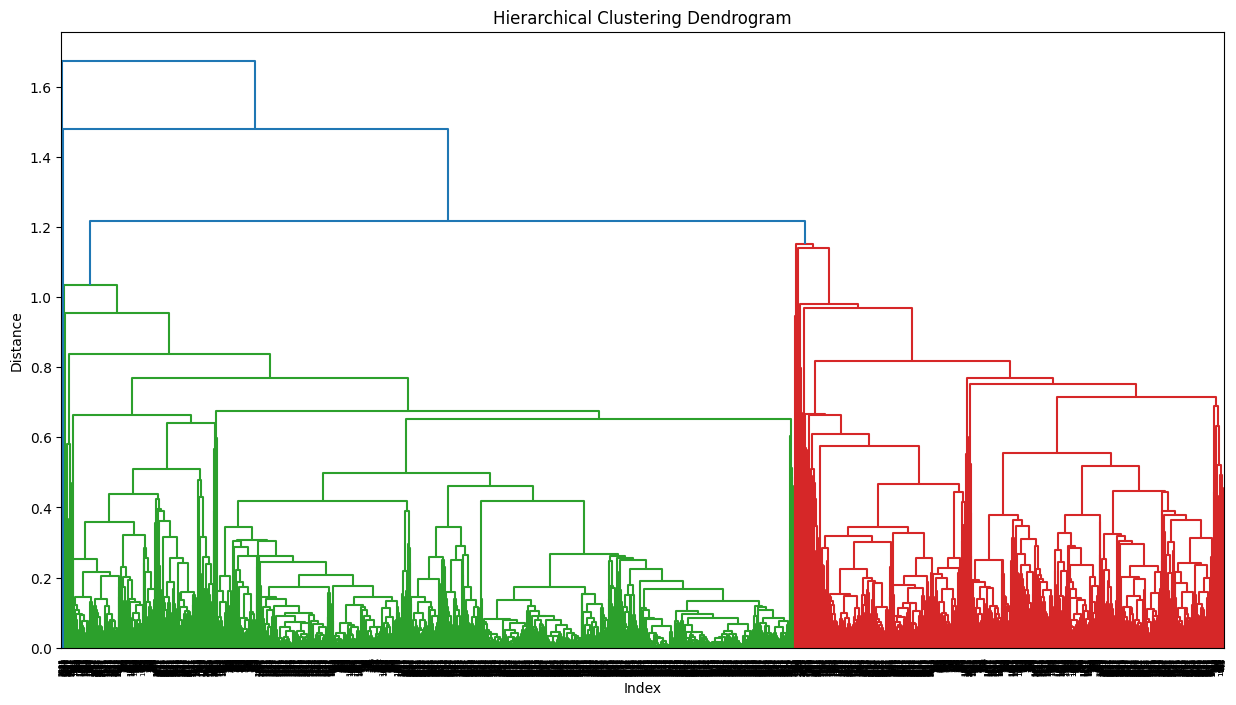

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch ## for creating dendrogram
z = linkage(norm_df,method = "average", metric = "euclidean")
plt.figure(figsize=(15,8))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
    z,
    #leaf_roation = 6.,    #rotates the x axis labels
    #leaf_fon_roation = 15. #font size for the x axis labels
)
plt.show()

In [24]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(norm_df)

DBSCAN(eps=0.8, min_samples=6)

In [25]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

cl
pd.set_option('display.max_rows', None)

In [27]:
df1 = pd.concat([data, cl], axis=1)
df1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
5       16420           0          1          1          1            0   
6       84914           0          3          1          1        27482   
7       20856           0          1          1          1         5250   
8      443003           0          3          2          1         1753   
9      104860           0          3          1          1        28426   
10      40091           0          2          1          1         7278   
11      96522           0          5          1          1        61105   
12      43382           0          2          1          1        11150   
13      43097           0          1          1          1         3258   
14      17648           0          1          1          1            0   
15      28495           0          4          1          1        49442   
16      51890           0          4          1          1        48963   
17      13958           0          1          1          1         4291   
18      91473           0          3          1          1        27408   
19      23354           0          3          1          1        10447   
20     120576           0          5          1          1        58831   
21     185681        2024          1          1          1        13300   
22      20584           0          1          1          1         3450   
23      66275           0          1          1          1         2533   
24     205651         500          1          1          1         4025   
25      20726           0          1          1          1         1375   
26      18521           0          1          1          1         1227   
27       8828           0          1          1          1            0   
28      59763           0          3          1          1        33772   
29      19221           0          1          1          1         4655   
30     177926           0          3          1          1        20797   
31      10021           0          1          1          1            0   
32     276571           0          4          1          1        42044   
33      18047           0          1          1          1          100   
34      43832           0          1          1          1            0   
35     123759           0          4          1          1        50572   
36      23193           0          1          1          1          650   
37      68666           0          1          1          1          350   
38      59990           0          3          1          1        27878   
39       2176           0          1          1          1            0   
40      34616           0          1          1          1         1750   
41      10470           0          4          1          1        38094   
42      60313           0          1          1          1        10000   
43     619393           0          3          1          1        15008   
44     121260           0          3          1          1        18493   
45     288865         967          1          1          1        23600   
46      92336           0          2          1          1        11214   
47      36924           0          1          1          1         5900   
48      70312           0          3          1          1        34678   
49      17051           0          1          1          1         1150   
50     108137           0          1          1          1         6368   
51       1300           0          1          1          1          370   
52     118531           0      

Text(0.5, 1.0, 'DBSCAN')

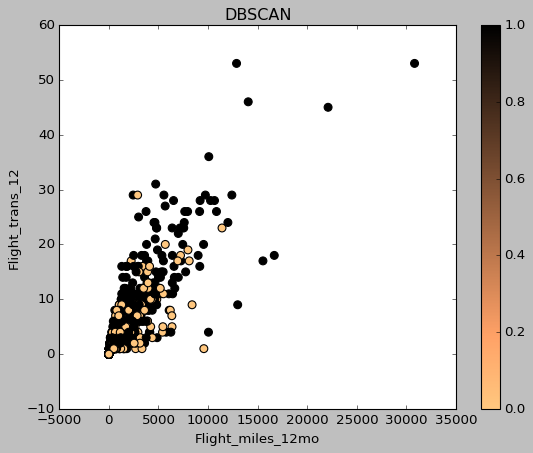

In [28]:
import matplotlib.pyplot as plt
plt.style.use('classic')

df1.plot(x = "Flight_miles_12mo", y = "Flight_trans_12",c=dbscan.labels_ , kind = "scatter", s = 50, cmap = plt.cm.copper_r)
plt.title('DBSCAN')

In [29]:
dl = dbscan.labels_

In [30]:
import sklearn
sklearn.metrics.silhouette_score(norm_df, dbscan.labels_)

0.535930510919477

In [31]:
clf = KMeans(n_clusters=5)
y_means = clf.fit_predict(norm_df)

y_means

array([0, 0, 0, ..., 1, 4, 4], dtype=int32)

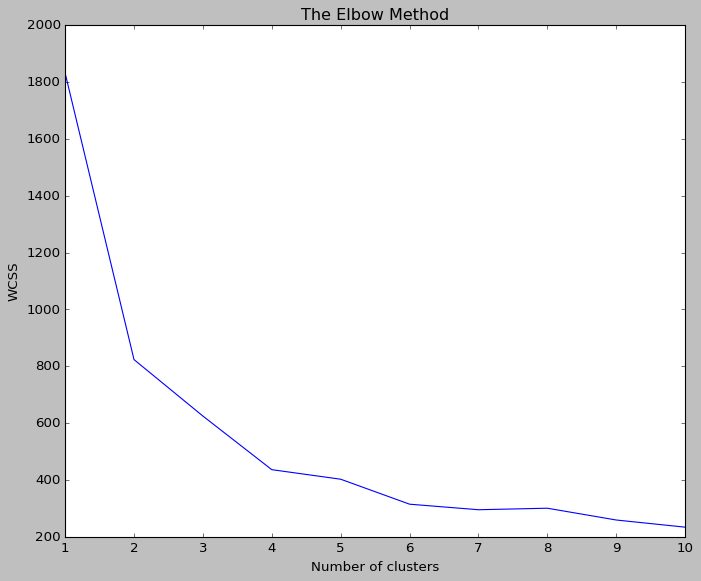

In [32]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,)
    kmeans.fit(norm_df)
    WCSS.append(kmeans.inertia_) ## inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
cl1 = pd.DataFrame(y_means, columns=['cluster'])
cl1

cluster
0           0
1           0
2           0
3           0
4           1
5           0
6           2
7           3
8           1
9           1
10          0
11          1
12          0
13          0
14          0
15          1
16          1
17          3
18          1
19          1
20          1
21          3
22          0
23          0
24          0
25          0
26          0
27          0
28          1
29          3
30          2
31          0
32          2
33          0
34          0
35          1
36          3
37          0
38          1
39          3
40          0
41          1
42          3
43          1
44          2
45          3
46          0
47          3
48          1
49          0
50          0
51          0
52          1
53          3
54          0
55          0
56          2
57          3
58          2
59          1
60          2
61          0
62          0
63          0
64          0
65          1
66          0
67          2
68          1
69          1
70          0
71          2
72          2
73          0
74          2
75          2
76          0
77          2
78          1
79          1
80          3
81          0
82          0
83          0
84          0
85          1
86          3
87          2
88          0
89          3
90          3
91          0
92          1
93          3
94          1
95          0
96          0
97          2
98          0
99          1
100         1
101         3
102         0
103         3
104         0
105         1
106         3
107         3
108         1
109         1
110         2
111         3
112         2
113         3
114         3
115         2
116         0
117         3
118         1
119         3
120         0
121         1
122         1
123         1
124         2
125         1
126         1
127         1
128         3
129         1
130         3
131         3
132         3
133         3
134         1
135         3
136         2
137         1
138         3
139         0
140         0
141         0
142         0
143         2
144         2
145         3
146         0
147         1
148         2
149         0
150         1
151         1
152         2
153         0
154         1
155         2
156         2
157         1
158         1
159         0
160         2
161         1
162         3
163         1
164         1
165         0
166         0
167         1
168         1
169         1
170         1
171         0
172         1
173         3
174         2
175         1
176         3
177         3
178         3
179         3
180         0
181         1
182         0
183         3
184         2
185         2
186         1
187         0
188         2
189         0
190         1
191         1
192         1
193         0
194         3
195         0
196         1
197         2
198         3
199         1
200         1
201         3
202         0
203         1
204         0
205         0
206         1
207         3
208         1
209         0
210         1
211         0
212         0
213         1
214         0
215         2
216         0
217         0
218         1
219         2
220         1
221         1
222         3
223         0
224         2
225         0
226         3
227         1
228         0
229         2
230         1
231         1
232         0
233         3
234         3
235         3
236         0
237         3
238         1
239         0
240         2
241         3
242         2
243         2
244         1
245         1
246         0
247         3
248         1
249         0
250         0
251         0
252         2
253         1
254         3
255         2
256         0
257         3
258         0
259         1
260         0
261         0
262         0
263         0
264         3
265         1
266         0
267         0
268         1
269         1
270         1
271         1
272         1
273         0
274         0
275         3
276         0
277         1
278         0
279         1
280         0
281         1
282         0
283         3
284         1
28

In [34]:
df2 = pd.concat([data, cl1], axis=1)
df2

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
5       16420           0          1          1          1            0   
6       84914           0          3          1          1        27482   
7       20856           0          1          1          1         5250   
8      443003           0          3          2          1         1753   
9      104860           0          3          1          1        28426   
10      40091           0          2          1          1         7278   
11      96522           0          5          1          1        61105   
12      43382           0          2          1          1        11150   
13      43097           0          1          1          1         3258   
14      17648           0          1          1          1            0   
15      28495           0          4          1          1        49442   
16      51890           0          4          1          1        48963   
17      13958           0          1          1          1         4291   
18      91473           0          3          1          1        27408   
19      23354           0          3          1          1        10447   
20     120576           0          5          1          1        58831   
21     185681        2024          1          1          1        13300   
22      20584           0          1          1          1         3450   
23      66275           0          1          1          1         2533   
24     205651         500          1          1          1         4025   
25      20726           0          1          1          1         1375   
26      18521           0          1          1          1         1227   
27       8828           0          1          1          1            0   
28      59763           0          3          1          1        33772   
29      19221           0          1          1          1         4655   
30     177926           0          3          1          1        20797   
31      10021           0          1          1          1            0   
32     276571           0          4          1          1        42044   
33      18047           0          1          1          1          100   
34      43832           0          1          1          1            0   
35     123759           0          4          1          1        50572   
36      23193           0          1          1          1          650   
37      68666           0          1          1          1          350   
38      59990           0          3          1          1        27878   
39       2176           0          1          1          1            0   
40      34616           0          1          1          1         1750   
41      10470           0          4          1          1        38094   
42      60313           0          1          1          1        10000   
43     619393           0          3          1          1        15008   
44     121260           0          3          1          1        18493   
45     288865         967          1          1          1        23600   
46      92336           0          2          1          1        11214   
47      36924           0          1          1          1         5900   
48      70312           0          3          1          1        34678   
49      17051           0          1          1          1         1150   
50     108137           0          1          1          1         6368   
51       1300           0          1          1          1          370   
52     118531           0      

Text(0.5, 1.0, 'Clusters using K-Means')

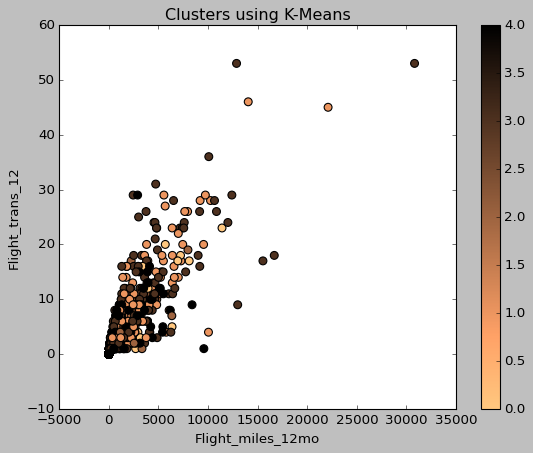

In [35]:
df2.plot(x="Flight_miles_12mo",y ="Flight_trans_12",c=y_means ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using K-Means')